In [80]:
import importlib
from utils import aspect_extraction, sentiment_extraction, general, embeddings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
importlib.reload(aspect_extraction)
importlib.reload(sentiment_extraction)
importlib.reload(general)
importlib.reload(embeddings)

<module 'utils.embeddings' from '/home/alessia/Documenti/University/Text mining and sentiment analysis/progetto/tinder/utils/embeddings.py'>

In [3]:
aspects_adjs, aspects_freq = aspect_extraction.get_aspects_adjs_and_freq()

In [4]:
aspects_polarity = sentiment_extraction.get_aspects_polarity(aspects_adjs)
aspects_score = general.normalize_series(aspects_polarity + aspects_freq)
aspects_embedding = embeddings.get_aspects_embeddings(aspects_freq)

In [5]:
def get_query_polarity_percentage(query, not_query = [], threshold=0.5, verbose=False):
    query_ranking = embeddings.get_query_similarities(
    aspects_embedding, query, not_query=not_query)
    
    query_ranking = pd.concat([aspects_score, query_ranking], axis=1).rename(columns={
        0: "score", 1: "query_similarity"}).sort_values(by=["query_similarity", "score"], ascending=False)
    query_aspects = query_ranking[query_ranking.query_similarity >= threshold].index

    pos, neg = sentiment_extraction.get_aspects_polarity_percentage(
        query_aspects, aspects_adjs, verbose=verbose)
        
    return pos, neg, query_aspects, query_ranking

__Casual sex__

In [83]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["casual", "sex"])
print(f"positive: {pos}, negative: {neg}")

expansion: ['casual', 'sex', 'sexual', 'anal sex', 'casual', 'chastity bono announces', 'cybersex', 'mutual masturbation', 'extramarital sex', 'faking orgasms', 'penetrative sex', 'sexual intercourse']
positive: 40.44943820224719, negative: 59.55056179775281


In [84]:
query_ranking.head()

,score,query_similarity
sex,0.583233,0.858055
sexual,0.618477,0.820098
intercourse,0.632806,0.750975
masturbation,0.632572,0.742415
homosexual,0.619454,0.612871


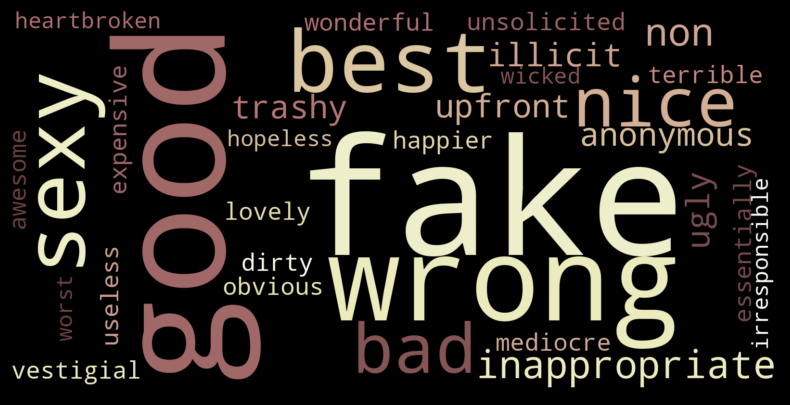

In [92]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

__Relationship__

In [93]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["relationship", "love"], not_query= ["friendship", "hate"])
print(f"positive: {pos}, negative: {neg}")

expansion: ['relationship', 'love', 'relationships', 'hank baskett iv', 'husband royston langdon', 'contractual arrangements', 'partnership', 'partner', 'arrangement', 'partership', 'sattawala', 'tyco valves']
positive: 86.31578947368422, negative: 13.684210526315791


In [94]:
query_ranking.head()

,score,query_similarity
relationship,0.792606,0.739650
relationships,0.771513,0.693989
arrangement,0.628633,0.648102
partnership,0.633744,0.626701
arrangements,0.626220,0.546573


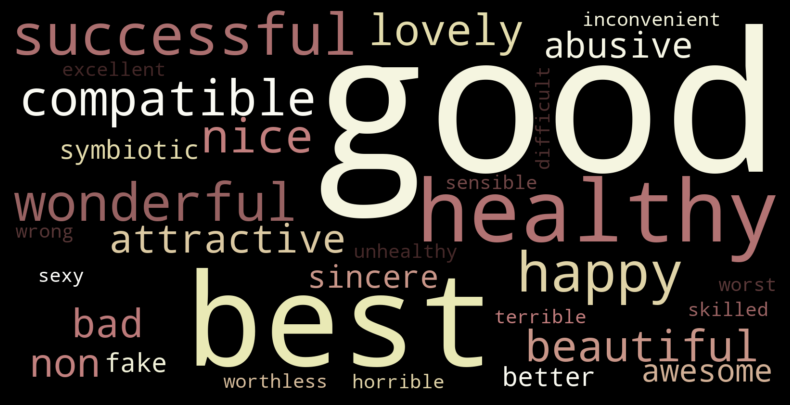

In [95]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

__Friendship__

In [96]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["friendship", "friends",  "new"], not_query= ["relationship", "love"])
print(f"positive: {pos}, negative: {neg}")

expansion: ['friendship', 'friends', 'new', 'relatives', 'richeys', 'acquaintances', 'schoolmates', 'newest', 'classmates', 'well wishers', 'newcomers', 'family', 'social networking']
positive: 93.92201834862385, negative: 6.077981651376147


In [97]:
query_ranking.head()

,score,query_similarity
friends,0.970313,0.810469
acquaintances,0.644501,0.711225
relatives,0.635091,0.669948
classmates,0.635718,0.662747
family,0.689902,0.627363


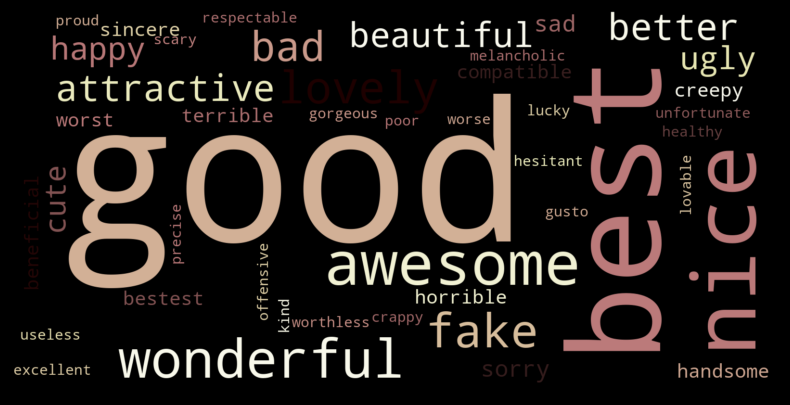

In [98]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

__Curiosity__

In [99]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["curiosity"])
print(f"positive: {pos}, negative: {neg}")

expansion: ['curiosity', 'curiousity', 'inquisitiveness', 'innate curiosity', 'morbid curiosity', 'fascination', 'intellectual curiosity', 'insatiable curiosity', 'curiosities', 'wonderment', 'childlike curiosity']
positive: 37.5, negative: 62.5


In [100]:
query_ranking.head()

,score,query_similarity
curiosity,0.634671,0.935293
lust,0.643359,0.579907
obsession,0.653627,0.571357
passion,0.660949,0.570375
playfulness,0.636309,0.565614


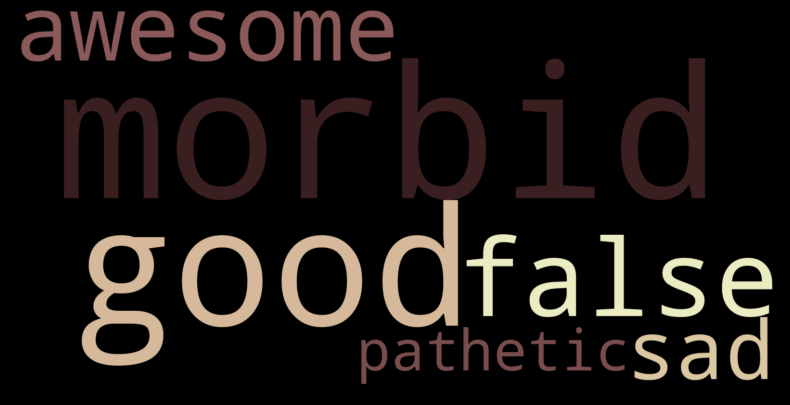

In [101]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

__Women__

In [102]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["woman", "girl"], not_query= ["men", "boy"])
print(f"positive: {pos}, negative: {neg}")

expansion: ['woman', 'girl', 'businesswoman', 'she', 'herself', 'her', 'housewife', 'lady', 'actress', 'burlesque dancer', 'songstress', 'reinvents herself']
positive: 85.54533508541394, negative: 14.454664914586072


In [103]:
query_ranking.head()

,score,query_similarity
woman,1.000000,0.746109
actress,0.642539,0.726695
her,0.640780,0.721337
she,0.768944,0.708155
girl,0.851457,0.704687


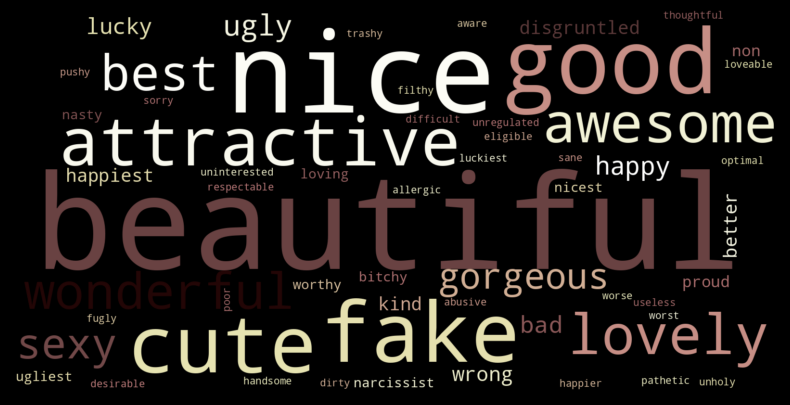

In [104]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

__Men__

In [105]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["men", "boy", "guy"], not_query=["woman", "girl"])
print(f"positive: {pos}, negative: {neg}")

expansion: ['men', 'boy', 'guy', 'guys', 'dude', 'dudes', 'buddies', 'guys', 'buddy', 'kid', 'hitting fungos', 'fellas', 'crooks sociopaths']
positive: 70.74074074074073, negative: 29.259259259259256


In [106]:
query_ranking.head()

,score,query_similarity
guys,0.513028,0.825476
guy,0.918091,0.810841
dude,0.670051,0.777926
dudes,0.672744,0.775220
fellas,0.683432,0.758112


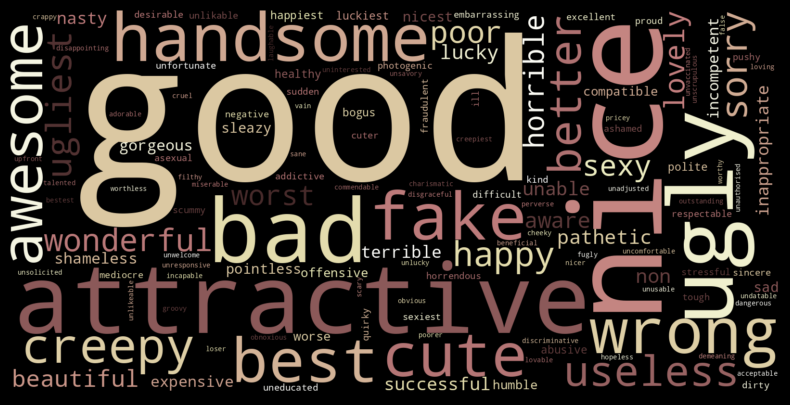

In [107]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

__Self Esteem__

In [108]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["self", "esteem"])
print(f"positive: {pos}, negative: {neg}")

expansion: ['self', 'esteem', 'self esteem', 'selfconfidence', 'manly virtues', 'reverence', 'ego', 'amour propre', 'respectfulness', 'wholeheartedness', 'narcissistic', 'dutifulness']
positive: 46.875, negative: 53.125


In [109]:
query_ranking.head()

,score,query_similarity
ego,0.647157,0.637566
esteem,0.638360,0.634069
narcissism,0.645061,0.605324
self,0.644249,0.573785
affection,0.633744,0.566085


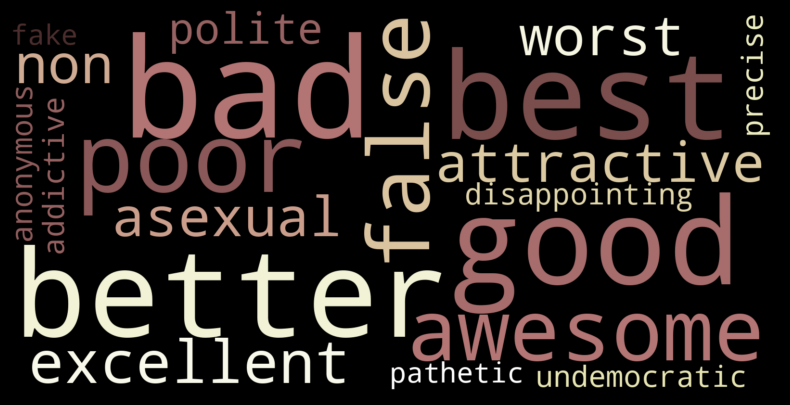

In [110]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

__Attractiveness (appearence)__

In [111]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["attractiveness", "appearence"], threshold=0.4)
print(f"positive: {pos}, negative: {neg}")

expansion: ['attractiveness', 'appearence', 'appearance', 'apperance', 'desirability', 'attractive', 'marketability', 'facial attractiveness', 'appearance', 'comeliness', 'facial symmetry', 'allure']
positive: 26.262626262626267, negative: 73.73737373737373


In [112]:
query_ranking.head()

,score,query_similarity
attractiveness,0.622102,0.715515
appearance,0.634041,0.637597
aesthetic,0.649848,0.470258
beauty,0.634695,0.469298
unattractive,0.620466,0.459300


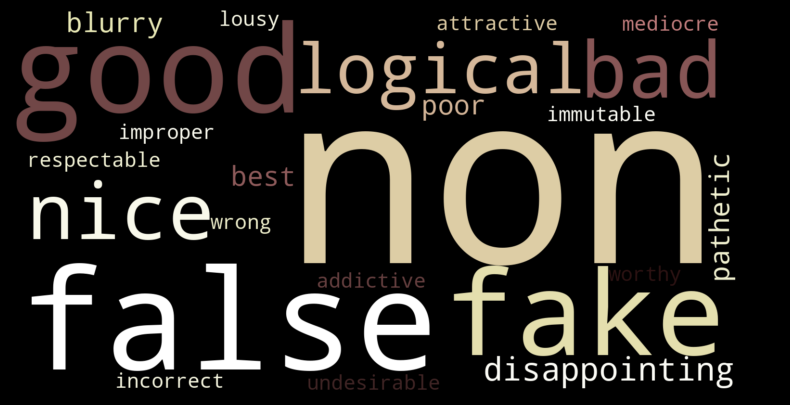

In [113]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

__Attractiveness (intelligence)__

In [114]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["witty", "intelligence"], threshold=0.4)
print(f"positive: {pos}, negative: {neg}")

expansion: ['witty', 'intelligence', 'perceptive', 'tapes knocke', 'humor', 'insightful', 'quick witted', 'wit', 'intelligence', 'sharp witted', 'rapier sharp', 'dryly humorous']
positive: 60.0, negative: 40.0


In [115]:
query_ranking.head()

,score,query_similarity
wit,0.627135,0.710288
humor,0.661436,0.675605
sarcastic,0.629347,0.616033
sly,0.631790,0.609330
funny,0.699881,0.593727


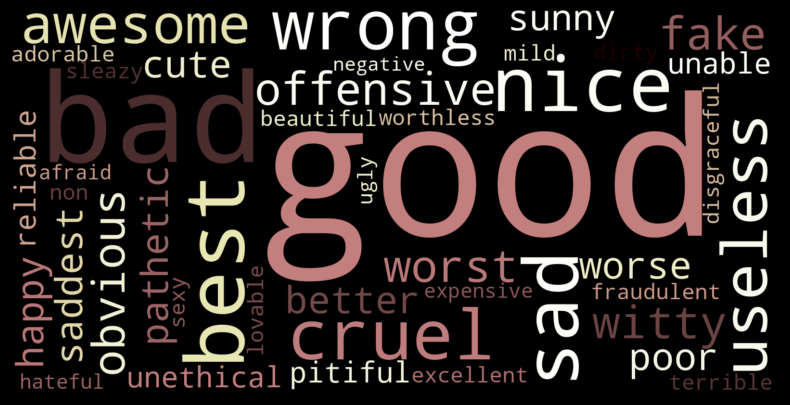

In [116]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)